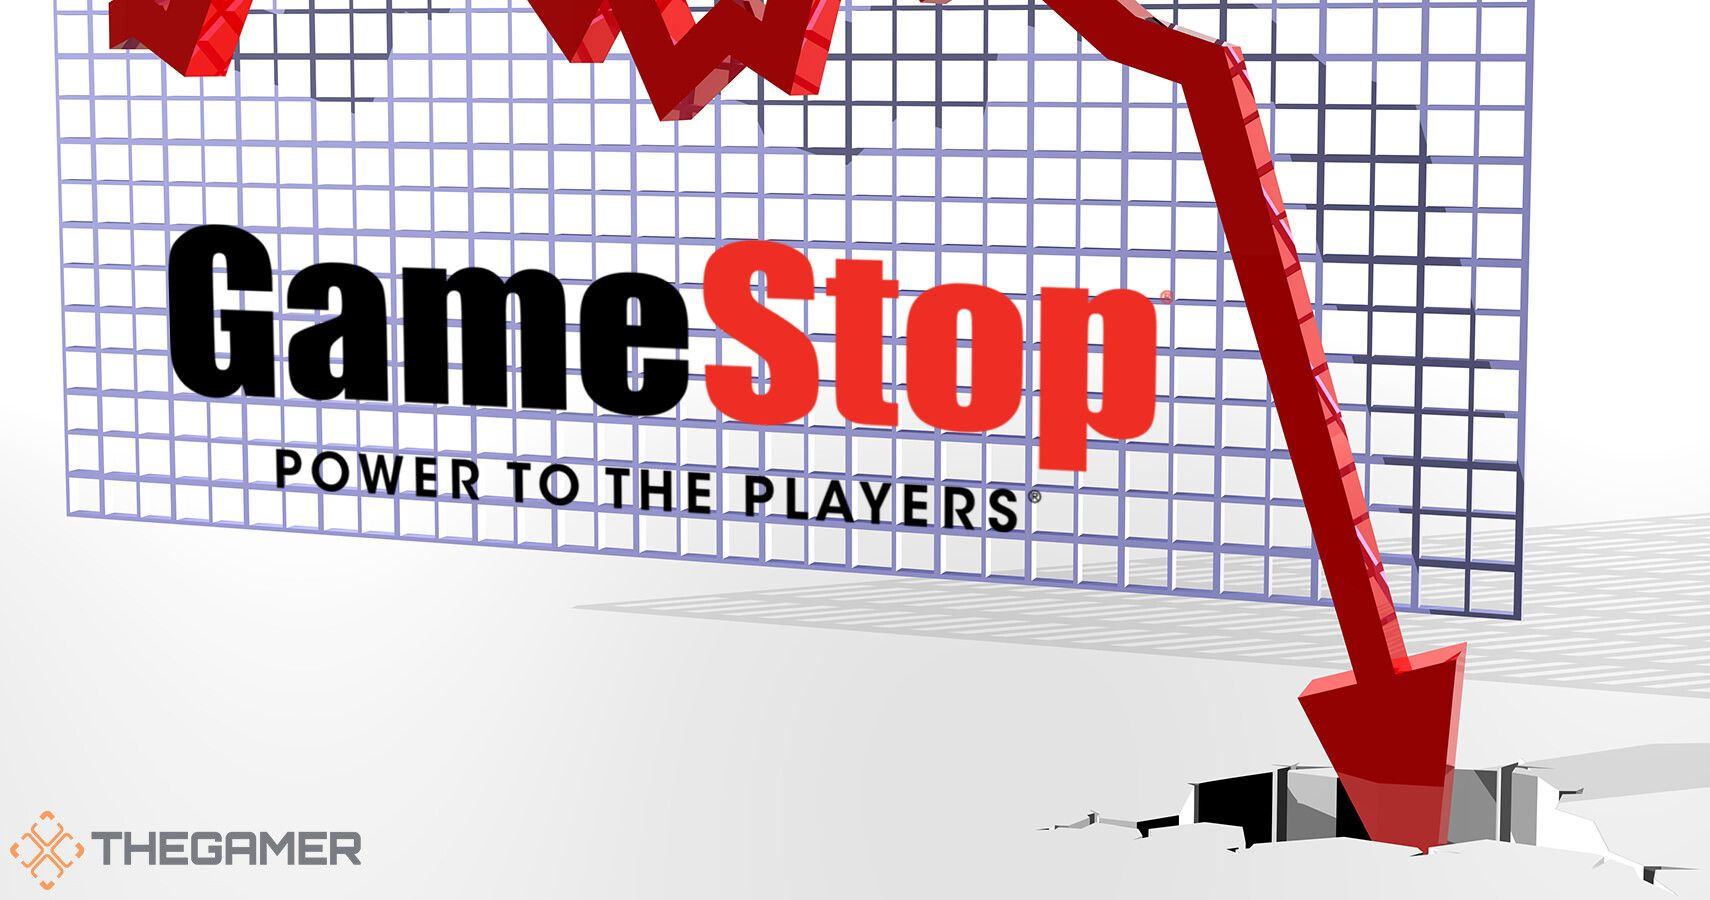

In [60]:
from IPython.display import Image,HTML
Image(filename=r"C:\Users\DELL\Downloads\Gamestop-Stock-Tanks.jpg",height=600,width=1000)

**Gamestop corporation is the largest video game retailer in the US.** The 37 year old company was in the news in the beginning of 2021 due to the tremendous increase in its stock prices. Almost a 1700% hike was seen in January 2021 from the previous year's december.

**Let us dive deep into exploring the factors like open price, close price and volume of stocks traded of the company over the years.**

## Obtaining data and importing libraries

In [2]:
import numpy as np
import pandas as pd   

#Importing data visulaisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

import datetime as dt
import missingno as msno

In [3]:
stock_df=pd.read_csv(r"C:\Users\DELL\Desktop\Datasets\GME_stock.csv")
stock_df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [4]:
print('Shape of stock_df: ',stock_df.shape)
print('Name of the columns of stock_df :',stock_df.columns)

Shape of stock_df:  (4773, 7)
Name of the columns of stock_df : Index(['date', 'open_price', 'high_price', 'low_price', 'close_price',
       'volume', 'adjclose_price'],
      dtype='object')


<Figure size 144x144 with 0 Axes>

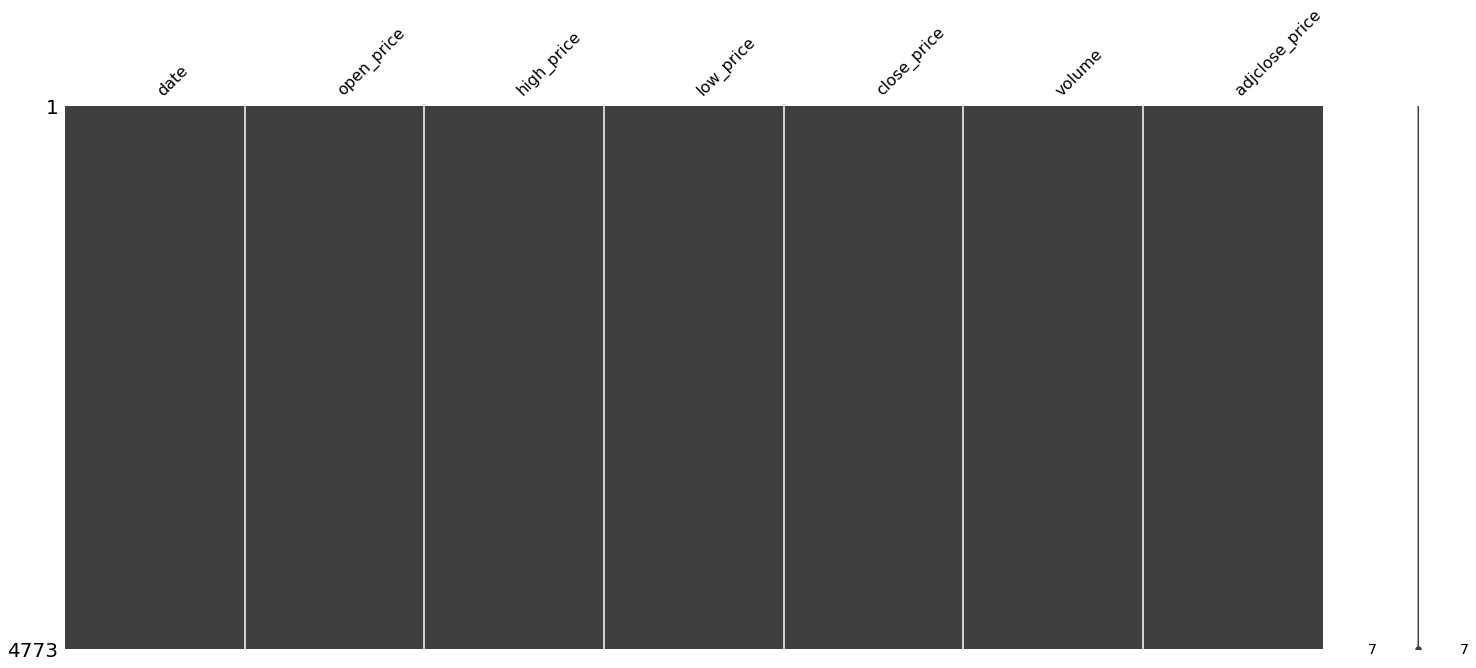

In [5]:
#Checking if there are any missing values

plt.figure(figsize=(2,2))
msno.matrix(stock_df)

No missing values are there in the dataframe.

In [6]:
#Statistical insights into the data

stock_df.describe().T

,count,mean,std,min,25%,50%,75%,max
open_price,4773.0,2.320100e+01,1.469588e+01,2.850000,1.136000e+01,2.176000e+01,2.942000e+01,3.548300e+02
high_price,4773.0,2.369359e+01,1.621022e+01,2.940000,1.157500e+01,2.211000e+01,3.017000e+01,4.830000e+02
low_price,4773.0,2.271431e+01,1.362819e+01,2.570000,1.113000e+01,2.143000e+01,2.872000e+01,2.490000e+02
close_price,4773.0,2.319323e+01,1.451389e+01,2.800000,1.135000e+01,2.176000e+01,2.943000e+01,3.475100e+02
volume,4773.0,3.398255e+06,6.547035e+06,65000.000000,1.528900e+06,2.491800e+06,3.791600e+06,1.967843e+08
adjclose_price,4773.0,1.688290e+01,1.101995e+01,2.555174,9.607993e+00,1.547917e+01,2.220543e+01,3.475100e+02


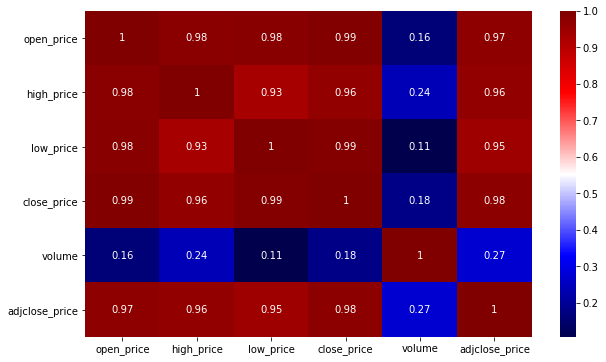

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(stock_df.corr(),annot=True,cmap='viridis')

The data contains the stockprices from **13/02/2002 to 28/01/2021**

## Open price distribution of Gamestop stock prices

**Opening price** is the price at which a stock started trading when the opening bell rang. For example, the New York Stock Excahnge (NYSE) opens at precisely 9:30 am eastern time. The price of the first trade for any listed stock is its daily opening price. 

Maximum open price of stock ever obtained: 354.8299865722656
Minimum open price of stock ever obtained: 2.8499999046325684


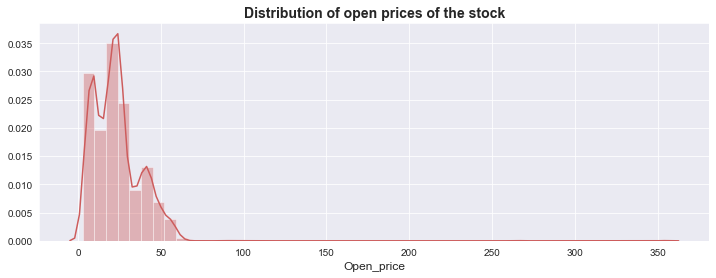

In [63]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
sns.distplot(stock_df['open_price'],color='Indianred')
plt.title('Distribution of open prices of the stock',fontweight='bold',fontsize=14)
plt.xlabel('Open_price',fontsize=12)

print('Maximum open price of stock ever obtained:',stock_df['open_price'].max())
print('Minimum open price of stock ever obtained:',stock_df['open_price'].min())

The distribution plot shows that the stock prices have been below 60 US dollars per share for most of the days. Minimum and maximum stock prices of Gamestop in a span of 19 years (2002-2021) were 2.84 and 354.82 US dollars per share respectively.

**When were the maximum and minimum open price values observed?**

In [9]:
#Converting string object to datetime for analysis

stock_df['date']=pd.to_datetime(stock_df['date'])
stock_df['year']=stock_df['date'].dt.year
stock_df['month']=stock_df['date'].dt.month
stock_df.head(2)

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,year,month
0,2021-01-28,265.000000,483.0,112.25,193.600006,58815800.0,193.600006,2021,1
1,2021-01-27,354.829987,380.0,249.00,347.510010,93396700.0,347.510010,2021,1


In [61]:
fig=px.line(x=stock_df['year'],y=stock_df['open_price'])
fig.update_layout(template='plotly_dark',title='Year wise open price distribution',xaxis_title='year',yaxis_title='open_price')

From the plot, it can seen that there was a sudden **spike in the stock prices is seen in 2021.**

In [11]:
#Getting the dates on which the maximum and the minimum open price values of the stocks were observed.

for i in stock_df['open_price'].index:
    if (stock_df['open_price'][i]==stock_df['open_price'].max()):
        print('The maximum stock price of Gamestop were observed on: ', stock_df['date'][i])
    elif (stock_df['open_price'][i]==stock_df['open_price'].min()):
        print('The minimum stock price of Gamestop were observed on: ', stock_df['date'][i])
    else:
        pass

The maximum stock price of Gamestop were observed on:  2021-01-27 00:00:00
The minimum stock price of Gamestop were observed on:  2020-04-03 00:00:00


## Close price, High price & Low price distribution

**Closing price** is the last price at which an individual stock traded during a regular trading day before the closure of stock exchange. 

**High price** is the highest price at which a stock traded during a period. This dataset gives the high and ow prices of the stock for the day which are known as intra day high and low.

**Low price** is the lowest price at which a specific stock trades over a trading day.

Maximum close price of stock ever obtained: 347.510009765625
Minimum close price of stock ever obtained: 2.799999952316284


Maximum high price of stock ever obtained: 483.0
Minimum high price of stock ever obtained: 2.940000057220459


Maximum low price of stock ever obtained: 249.0
Minimum low price of stock ever obtained: 2.5699999332427983


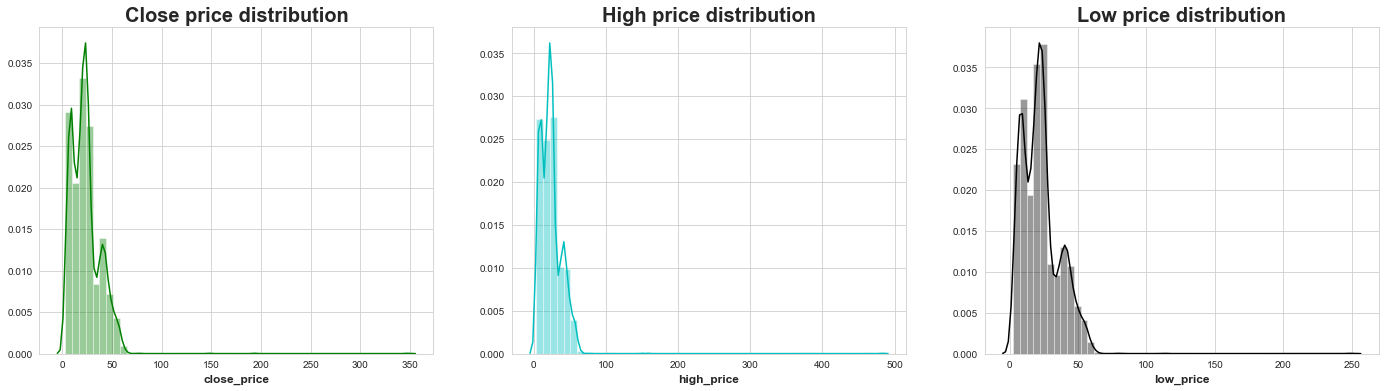

In [12]:
fig,axes=plt.subplots(1,3,figsize=(24,6))

#Close price
plt.subplot(1,3,1)
plt.title('Close price distribution',fontweight='bold',fontsize=20)
plt.xlabel('close_price',fontweight='bold',fontsize=12)
sns.distplot(stock_df['close_price'],color='g')

print('Maximum close price of stock ever obtained:',stock_df['close_price'].max())
print('Minimum close price of stock ever obtained:',stock_df['close_price'].min())
print('\n')


#High price
plt.subplot(1,3,2)
plt.title('High price distribution',fontweight='bold',fontsize=20)
plt.xlabel('high_price',fontweight='bold',fontsize=12)
sns.distplot(stock_df['high_price'],color='c')

print('Maximum high price of stock ever obtained:',stock_df['high_price'].max())
print('Minimum high price of stock ever obtained:',stock_df['high_price'].min())
print('\n')


#Low price
plt.subplot(1,3,3)
plt.title('Low price distribution',fontweight='bold',fontsize=20)
plt.xlabel('low_price',fontweight='bold',fontsize=12)
sns.distplot(stock_df['low_price'],color='black')

print('Maximum low price of stock ever obtained:',stock_df['low_price'].max())
print('Minimum low price of stock ever obtained:',stock_df['low_price'].min())

In [13]:
fig=make_subplots(rows=1,cols=3)

#Close price
fig.add_trace(go.Scatter(x=stock_df['year'],y=stock_df['close_price'],mode='markers',name='close_price'),row=1,col=1)


#High price
fig.add_trace(go.Scatter(x=stock_df['year'],y=stock_df['high_price'],mode='markers',name='high_price'),row=1,col=2)


#Low price
fig.add_trace(go.Scatter(x=stock_df['year'],y=stock_df['low_price'],mode='markers',name='low_price'),row=1,col=3)

fig.update_layout(template='plotly_dark',title='Year wise distribution',xaxis_title='year',yaxis_title='price')

In [14]:
#Getting the dates on which the maximum and the minimum close price values of the stocks were observed.
for i in stock_df['close_price'].index:
    if (stock_df['close_price'][i]==stock_df['close_price'].max()):
        print('The maximum close price of Gamestop were observed on: ', stock_df['date'][i])
    elif (stock_df['close_price'][i]==stock_df['close_price'].min()):
        print('The minimum close price of Gamestop were observed on: ', stock_df['date'][i])
    else:
        pass
print('\n')

#Getting the dates on which the maximum and the minimum high price values of the stocks were observed.
for i in stock_df['high_price'].index:
    if (stock_df['high_price'][i]==stock_df['high_price'].max()):
        print('The maximum high price of Gamestop were observed on: ', stock_df['date'][i])
    elif (stock_df['high_price'][i]==stock_df['high_price'].min()):
        print('The minimum high price of Gamestop were observed on: ', stock_df['date'][i])
    else:
        pass
print('\n')

#Getting the dates on which the maximum and the minimum low price values of the stocks were observed.
for i in stock_df['low_price'].index:
    if (stock_df['low_price'][i]==stock_df['low_price'].max()):
        print('The maximum low price of Gamestop were observed on: ', stock_df['date'][i])
    elif (stock_df['low_price'][i]==stock_df['low_price'].min()):
        print('The minimum low price of Gamestop were observed on: ', stock_df['date'][i])
    else:
        pass

The maximum close price of Gamestop were observed on:  2021-01-27 00:00:00
The minimum close price of Gamestop were observed on:  2020-04-03 00:00:00


The maximum high price of Gamestop were observed on:  2021-01-28 00:00:00
The minimum high price of Gamestop were observed on:  2020-04-03 00:00:00


The maximum low price of Gamestop were observed on:  2021-01-27 00:00:00
The minimum low price of Gamestop were observed on:  2020-04-03 00:00:00


## Adjusted close price

The **adjusted close price** amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. It is a calculation adjustment made to a stocks closing price.

***Close price vs adjusted close price***

The closing price is the raw price i.e., the last value transacted before the market closes while adjusted close price is calculated after making adjustments to compensate for corporate actions like stock splits and dividends that could've affected the stock's value. **Adjusted close price is more complex to calculate but gives more accurate results and indicates the true value of the stocks.**

#### Adjusted close price vs close price distribution

In [15]:
fig=make_subplots(rows=1,cols=2)

#Adjusted close price
fig.add_trace(go.Scatter(x=stock_df['year'],y=stock_df['adjclose_price'],mode='markers',name='adjclose_price'),row=1,col=1)

#Close price
fig.add_trace(go.Scatter(x=stock_df['year'],y=stock_df['adjclose_price'],mode='markers',name='close_price'),row=1,col=2)

fig.update_layout(template='plotly_dark',title='Year wise distribution',xaxis_title='year',yaxis_title='price')
fig.show()

print('Maximum adjusted close price of stock ever obtained:',stock_df['adjclose_price'].max())
print('Minimum adjusted close price of stock ever obtained:',stock_df['adjclose_price'].min())

print('\n')

for i in stock_df['adjclose_price'].index:
    if (stock_df['adjclose_price'][i]==stock_df['adjclose_price'].max()):
        print('The maximum adjusted close price ever obtained was on: ', stock_df['date'][i])
    elif (stock_df['adjclose_price'][i]==stock_df['adjclose_price'].min()):
        print('The minimum adjusted close price ever obtained was on: ', stock_df['date'][i])
    else:
        pass

Maximum adjusted close price of stock ever obtained: 347.510009765625
Minimum adjusted close price of stock ever obtained: 2.5551743507385254


The maximum adjusted close price ever obtained was on:  2021-01-27 00:00:00
The minimum adjusted close price ever obtained was on:  2003-02-11 00:00:00


The **maximum and mimimum close price** values have been **347.51 and 2.79** respectively while the **maximum and minimum adjusted close prices** have been **347.51 and 2.55 respectively.**

The date of the maxima of the two cases are the same i.e., 27th January 2021 however **the date of two achieving their minima is not the same.** The minima of close_price was achieved on 3rd April 2020 while that of adjclose_price was on 11th February 2003.

## Volume of stocks traded

**Volume of trade**, also known as **trading volume**, refers to the quantity of shares or contracts that belongs to a given security traded on a daily basis. Trade volume is said to be high when a given security is traded more actively and vice versa. 

In [16]:
fig=px.line(x=stock_df['year'],y=stock_df['volume'])
fig.update_layout(template='plotly_dark',title='Year wise volume traded',xaxis_title='year',yaxis_title='volume')
fig.show()

print('Maximum low price of stock ever obtained:',stock_df['low_price'].max())
print('Minimum low price of stock ever obtained:',stock_df['low_price'].min())

print('\n')

for i in stock_df['volume'].index:
    if (stock_df['volume'][i]==stock_df['volume'].max()):
        print('The maximum volume ever traded was on: ', stock_df['date'][i])
    elif (stock_df['volume'][i]==stock_df['volume'].min()):
        print('The minimum volume ever traded was on: ', stock_df['date'][i])
    else:
        pass

Maximum low price of stock ever obtained: 249.0
Minimum low price of stock ever obtained: 2.5699999332427983


The maximum volume ever traded was on:  2021-01-22 00:00:00
The minimum volume ever traded was on:  2002-06-18 00:00:00


## Amount of stocks traded

The **amount of stocks traded** is given by **volume * open price.**

In [62]:
fig=px.line(x=stock_df['year'],y=stock_df['volume']*stock_df['open_price'])
fig.update_layout(template='plotly_dark',title='Year wise volume traded',xaxis_title='year',yaxis_title='amount')
fig.show()

## Creating the model

In [18]:
#Importing deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import math

In [19]:
#PREPARING THE DATA

stock_df.sort_index(ascending=False,axis=0,inplace=True)
df=stock_df[['date','close_price']]
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()

,close_price
date,
2002-02-13,10.050
2002-02-14,10.000
2002-02-15,9.950
2002-02-19,9.550
2002-02-20,9.875


In [20]:
#To array format
df_val=df.values 
df_val

array([[ 10.05000019],
       [ 10.        ],
       [  9.94999981],
       ...,
       [147.97999573],
       [347.51000977],
       [193.6000061 ]])

In [21]:
#Splitting the dataset to train and test (80% train and 20% test data)

train=df_val[:3818]   
test=df_val[3818:]

In [22]:
#Scaling the features to be valued between 0 & 1. 
#Scaling ensures optimal performance of the model.

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_val)

In [23]:
#Creting x_train and y_train for 60 timesteps
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#Converting to 3-D array because LSTM model requires 3-D input.
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [24]:
# Build the LSTM model
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))


#Compiling 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fitting
model.fit(x_train, y_train, epochs = 125, batch_size = 32)

Epoch 1/125
118/118 [==============================] - 19s 69ms/step - loss: 3.5207e-04
Epoch 2/125
118/118 [==============================] - 8s 71ms/step - loss: 8.5389e-05
Epoch 3/125
118/118 [==============================] - 11s 89ms/step - loss: 7.5918e-05
Epoch 4/125
118/118 [==============================] - 10s 86ms/step - loss: 6.3787e-05
Epoch 5/125
118/118 [==============================] - 10s 81ms/step - loss: 5.2880e-05
Epoch 6/125
118/118 [==============================] - 10s 81ms/step - loss: 5.1499e-05
Epoch 7/125
118/118 [==============================] - 10s 81ms/step - loss: 4.9814e-05
Epoch 8/125
118/118 [==============================] - 10s 81ms/step - loss: 4.1294e-05
Epoch 9/125
118/118 [==============================] - 10s 81ms/step - loss: 4.1799e-05
Epoch 10/125
118/118 [==============================] - 10s 82ms/step - loss: 3.7752e-05 1s - lo
Epoch 11/125
118/118 [==============================] - 10s 82ms/step - loss: 4.1223e-05
Epoch 12/125
118/118 [=

In [25]:
inputs = df_val[len(df_val) - len(test) - 60:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [26]:
#Test data
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [27]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predictions = model.predict(X_test)

#Undo scaling
predictions = scaler.inverse_transform(predictions)

In [28]:
#Root mean squared error
rmse=np.sqrt(np.mean(np.power((predictions),2)))
rmse

7.9597980298054765

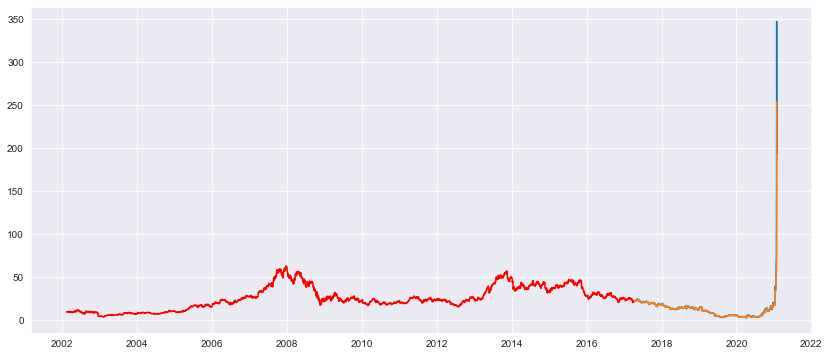

In [59]:
#Plotting all the values
train = df[:3818]
test = df[3818:]
test['Predictions'] = predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
plt.plot(train['close_price'],color='r')
plt.plot(test[['close_price','Predictions']])

**Why was there a sudden spike in the stock values of the company in January 2021?** 

The Gamestop Corporation which sells and hosts hardware and software video games in stores had been witnessing a contsant fall in its stock prices which was catalysed as the pandemic hit because people had no choice but to shift to online channels to play games.

Due to the previous falling trend of the stock prices, large hedge funds and the people who bet against the stock believed that the stock prices would go down furthur in the coming months. People started discussing and making potential memes on Reddit's subreddit 'wallstreetbets'.

Several posts on Reddit around January 2021 brought up GameStop as a potentially viable inverstment opportunity and tweets of notable personlaities like Elon Musk escalated the stock prices even more.The dramatic increase in the stock prices was a result of constant efforts on social media to raise the value of company stock price and factors like short selling.